### Note: Haven't yet got to much analysis here. So far data has just been loaded and merged, and a couple graphs have been made.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-09/movies.csv')

df_bechdel = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-09/raw_bechdel.csv')
df_bechdel = df_bechdel.loc[:, ['imdb_id', 'rating']]
df = df.merge(df_bechdel, left_on='imdb_id', right_on='imdb_id')

df

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,...,released,actors,genre,awards,runtime,type,poster,imdb_votes,error,rating
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,...,08 Nov 2013,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...","Biography, Drama, History",Won 3 Oscars. Another 131 wins & 137 nominations.,134 min,movie,http://ia.media-imdb.com/images/M/MV5BMjExMTEz...,"143,446",NaN,3
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,...,02 Aug 2013,"Denzel Washington, Mark Wahlberg, Paula Patton...","Action, Comedy, Crime",1 win.,109 min,movie,http://ia.media-imdb.com/images/M/MV5BNTQ5MTgz...,"87,301",NaN,1
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,...,12 Apr 2013,"Chadwick Boseman, Harrison Ford, Nicole Behari...","Biography, Drama, Sport",3 wins & 13 nominations.,128 min,movie,http://ia.media-imdb.com/images/M/MV5BMTQwMDU4...,"43,608",NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,1971,tt0067741,Shaft,notalk,notalk,FAIL,53012938,70327868.0,107190108.0,1971FAIL,...,02 Jul 1971,"Richard Roundtree, Moses Gunn, Charles Cioffi,...","Action, Crime, Thriller",Won 1 Oscar. Another 4 wins & 4 nominations.,100 min,movie,http://ia.media-imdb.com/images/M/MV5BMTIwNzQy...,"10,275",NaN,1
1789,1971,tt0067800,Straw Dogs,notalk,notalk,FAIL,25000000,10324441.0,11253821.0,1971FAIL,...,29 Dec 1971,"Dustin Hoffman, Susan George, Peter Vaughan, T...",Thriller,Nominated for 1 Oscar. Another 1 win.,118 min,movie,http://ia.media-imdb.com/images/M/MV5BMTI4NDY3...,"37,726",NaN,1
1790,1971,tt0067116,The French Connection,notalk,notalk,FAIL,2200000,41158757.0,41158757.0,1971FAIL,...,09 Oct 1971,"Gene Hackman, Fernando Rey, Roy Scheider, Tony...","Action, Crime, Thriller",Won 5 Oscars. Another 18 wins & 8 nominations.,104 min,movie,http://ia.media-imdb.com/images/M/MV5BMTY5Nzg5...,"62,153",NaN,1
1791,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men-disagree,men,FAIL,3000000,4000000.0,4000000.0,1971FAIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


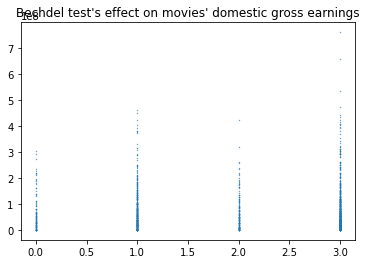

In [3]:
x = df.loc[:,'rating']
y = df.loc[:, 'domgross']

fig, ax = plt.subplots()

ax.scatter(x, y, s=0.1)
ax.set_title("Bechdel test's effect on movies' domestic gross earnings")

plt.show()

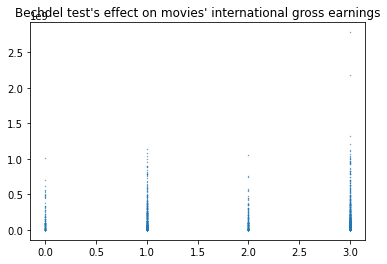

In [4]:
x = df.loc[:,'rating']
y = df.loc[:, 'intgross']

fig, ax = plt.subplots()

ax.scatter(x, y, s=0.1)
ax.set_title("Bechdel test's effect on movies' international gross earnings")

plt.show()